In [1]:
import statsmodels.formula.api as smf
from numpy.random import normal, binomial
from scipy.special import expit
from pandas import DataFrame
from graphviz import Digraph

In [2]:
conf_dag = Digraph(comment='Confounding')
conf_dag.edge('x', 'y', constraint='False')
conf_dag.edges([('c', 'x'), ('c', 'y')])

# Simulation Part 4 - Confounding

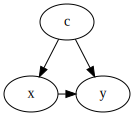

In [3]:
conf_dag

## Let's create our data

In [4]:
# Define our sample size
n = 100000

Which variable do we start with?

Let's do the confounder first!

In [5]:
# Generate data for c
c = normal(size=n)

Next up is the independent variable x

In [6]:
# Specify our betas
bx = {'i': 0, 'c': 1}

In [7]:
# Generate data for x
x = normal(bx['i'] + bx['c']*c)

Lastly we'll do the dependent variable y

In [8]:
# Specify betas
by = {'i': 0, 'x': 1, 'c': 2}

In [9]:
# y from a linear model
y_linear = normal(by['i'] + by['x']*x + by['c']*c)

In [10]:
# y from a logistic model
y_logist = binomial(1, expit(by['i'] + by['x']*x + by['c']*c))

In [11]:
data = DataFrame(dict(y_linear=y_linear, y_logist=y_logist, x=x, c=c))
data.head()

,c,x,y_linear,y_logist
0,-0.535223,0.044258,-0.686759,1
1,0.882482,-0.002553,3.228106,0
2,-0.102037,1.995046,0.994756,0
3,0.605951,1.127970,2.019753,0
4,-0.138624,0.394450,0.268860,1


## Let's fit the model

### Using the linear model

In [12]:
by

{'i': 0, 'x': 1, 'c': 2}

In [13]:
# Without c in the model
smf.ols('y_linear ~ x', data).fit().params

Intercept   -0.005305
x            2.004768
dtype: float64

In [14]:
# With c in the model
smf.ols('y_linear ~ x + c', data).fit().params

Intercept   -0.002793
x            0.999032
c            2.002060
dtype: float64

### Using the logistic model

In [15]:
by

{'i': 0, 'x': 1, 'c': 2}

In [16]:
smf.logit('y_logist ~ x', data).fit().params

Optimization terminated successfully.
         Current function value: 0.437909
         Iterations 7


Intercept    0.002583
x            1.551763
dtype: float64

In [17]:
smf.logit('y_logist ~ x + c', data).fit().params

Optimization terminated successfully.
         Current function value: 0.343164
         Iterations 7


Intercept    0.008956
x            1.020333
c            1.998591
dtype: float64